# Proyect 2 -. Cosmology

## Daniel Rodrigo Garduño Roa

In [7]:
from classy import Class 
import numpy as np 
import matplotlib.pyplot as plt
common_settings = {
                   'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   'H0':67.,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium
                   # (instead of automatic BBN adjustemn)
                   'YHe':0.246,
                   # other output and precision parameters
                   'P_k_max_1/Mpc':3.0,
                   'l_switch_limber':9
                   }
#
kvec = np.logspace(-4,np.log10(3),1000)

In [9]:
params = [ 
     [
        'omega_cdm', 
        np.linspace(0.08, 0.16, 5), 
        r'$\omega_\mathrm{cdm}$'
     ],
    [ 
        'omega_b', 
         np.linspace(0.014, 0.03, 5),
        r'$\omega_\mathrm{b}$' 
    ], 
    [ 
        'H0', 
        np.linspace(50, 90, 5), 
        r'$H_0$' 
    ],
] 
# later:
# for var_name, var_array, var_legend in params:

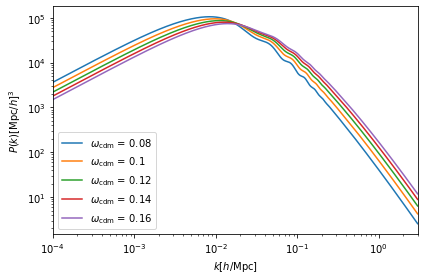

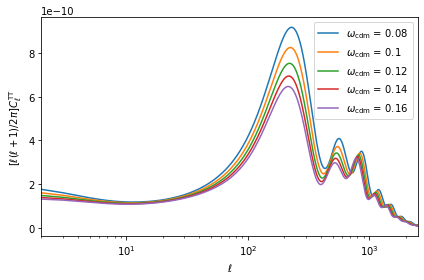

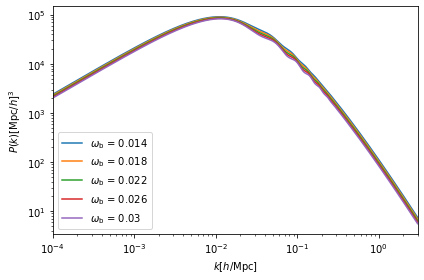

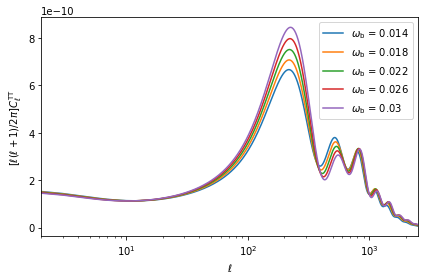

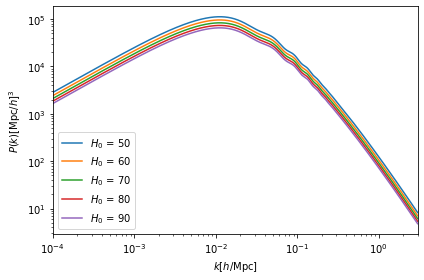

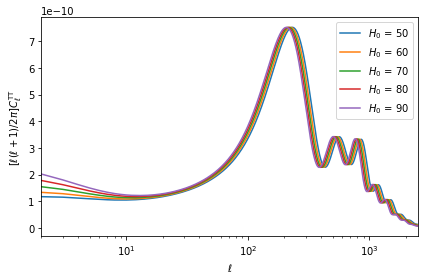

In [16]:
for var_name, var_array, var_legend in params: 
    fig_Pk, ax_Pk = plt.subplots() 
    fig_TT, ax_TT = plt.subplots() 
    for i, var in enumerate(var_array): 
        M = Class() 
        M.set(common_settings) 
        M.set({var_name: var})  # overwrite previous value 
        M.compute() 
        clM = M.lensed_cl(2500) # compute Cls 
        ll = clM['ell'][2:] 
        ax_TT.semilogx( 
            ll, 
            clM['tt'][2:]*ll*(ll+1)/(2.*np.pi),
            label="%s = %g"%(var_legend, var))
        pkM = [M.pk(k, 0.) for k in kvec] # read pk at z=0 
        ax_Pk.loglog( 
            kvec, 
            np.array(pkM), 
            label="%s = %g"%(var_legend, var)) 
        M.struct_cleanup() # clean Class 
        M.empty()
    ax_Pk.set_xlim([1.e-4,3.]) 
    ax_Pk.set_xlabel(r'$k$[$h$/Mpc]') 
    ax_Pk.set_ylabel(r'$P(k)$[Mpc/$h$]$^3$')
    ax_Pk.legend() 
    fig_Pk.tight_layout() 
    fig_Pk.savefig('spectra_%s_Pk.pdf'%var_name) 

    ax_TT.set_xlim([2,2500]) 
    ax_TT.set_xlabel(r'$\ell$') 
    ax_TT.set_ylabel( 
        r'$[\ell(\ell+1)/2\pi]C_\ell^\mathrm{TT}$'
    ) 
    ax_TT.legend() 
    fig_TT.tight_layout() 
    fig_TT.savefig('spectra_%s_cltt.pdf'%var_name)
